## Capston Project: Amazon Customer behavior
This project aims to classify Amazon customers by their add-to-cart behavior whether they add products while browsing (Yes), do not add any (No), or are uncertain (Maybe) based on their browsing activity and survey responses. To achieve this, we apply machine learning models, including K-Nearest Neighbor(KNN), Logistic Regression, Decision Trees, Support Vector Machines(SVM), XGBoost, GaussianNB, Random Forest.


The dataset is designed to provide insights into customer preferences, shopping habits, and decision-making processes. By analyzing it, researchers and analysts can gain a deeper understanding of consumer behavior, identify emerging trends, optimize marketing strategies, and enhance the overall customer experience on Amazon.


In [98]:
#https://medium.com/@shauvikbrahma/exploratory-data-analysis-on-amazon-customer-behavior-3e1fdd406bdf
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [99]:
from google.colab import files
uploaded = files.upload()

Saving AmazonCustomerBehaviorSurvey.csv to AmazonCustomerBehaviorSurvey (2).csv


In [100]:
#Data Loading: Load and preprocess the dataset
df = pd.read_csv("AmazonCustomerBehaviorSurvey.csv")
df.shape

(602, 23)

In [101]:
df.head(3)

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy


In [102]:
#Data dictionary provided

In [103]:
df.rename(columns={"Rating Accuracy": "Rating_Accuracy"}, inplace=True)

In [104]:
df.isna().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [106]:
df.isnull().sum()

,0
Timestamp,0
age,0
Gender,0
Purchase_Frequency,0
Purchase_Categories,0
Personalized_Recommendation_Frequency,0
Browsing_Frequency,0
Product_Search_Method,2
Search_Result_Exploration,0
Customer_Reviews_Importance,0


Observations:
- The data set contains 602 records with 23 features.
- There are 18 object data type and 5 int64 data type features.
- Only 2 null values are present in the data in the Product_search_Method column, which can be ignored
- The dataset contains a duplicated column, Personalized_Recommendation_Frequency: one copy is object and the other is int64.

In [107]:
#Data cleaning
df1 = df.copy()
df1
mask_drop = ((df1.columns == 'Personalized_Recommendation_Frequency') &
             (df1.dtypes == 'object'))
df1 = df1.loc[:, ~mask_drop]

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Browsing_Frequency                      602 non-null    object
 6   Product_Search_Method                   600 non-null    object
 7   Search_Result_Exploration               602 non-null    object
 8   Customer_Reviews_Importance             602 non-null    int64 
 9   Add_to_Cart_Browsing                    602 non-null    object
 10  Cart_Completion_Frequency               602 non-null    object
 11  Cart_A

In [109]:
#Replacing the null values in the 'Product_Search_Method' column with the mode value found within the same column.
df1.loc[df1['Product_Search_Method'].isnull(),'Product_Search_Method']=df['Product_Search_Method'].mode().tolist()[-1]

In [110]:
# Adding Date and Time columns by extracting data from Timestamp column
from datetime import timedelta
df1['Timestamp']=pd.to_datetime(df1['Timestamp'])
df1['Timestamp'] += timedelta(hours=5, minutes=30)
df1['Date'] = df1['Timestamp'].dt.strftime('%d/%m/%Y')
df1['Time'] = df1['Timestamp'].dt.time

/tmp/ipython-input-1552079671.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [111]:
#Adding age category column
def age_cat(row):
    x = row['age']
    if x < 18 :
        return 'Minor (<18)'
    elif (x > 18) & (x <= 25):
        return 'Young Adult (18-25)'
    elif (x > 25) & (x <= 40):
        return "Adult (26-40)"
    elif (x > 40) & (x <= 60) :
        return 'Middle-Aged Adult (41-60)'
    else :
        return 'Senior Citizen (>60)'
df1['Age_Category'] = df1.apply(age_cat , axis = 1)

In [112]:
#Adding Time Status Column
def Time_cat(x):
    if 6 <= x.hour < 12:
        return 'Morning'
    elif 12 <= x.hour < 18:
        return 'Afternoon'
    elif 18 <= x.hour < 21:
        return 'Evening'
    else:
        return 'Night'

df1['Time_Status'] = df1['Time'].apply(Time_cat)

In [113]:
#Dropping Timestamp column
df1 = df1.drop('Timestamp', axis = 1)

In [114]:
#Finding outliers for all object columns
def categorical_outlier_flags(df, threshold=0.01):
    flags = {}
    for c in df.select_dtypes(include='object').columns:
        freq = df[c].value_counts(dropna=False, normalize=True)
        flags[c] = (freq < threshold).any()
    return pd.Series(flags, name=f'has_rare(<{threshold*100:.1f}%)')

flags = categorical_outlier_flags(df1, threshold=0.01)
# Print only columns with rare categories:
print(flags[flags].index.tolist())

['Purchase_Categories', 'Service_Appreciation', 'Improvement_Areas', 'Date', 'Time']


In [115]:
#Checking Purchase_Categories col
col = 'Purchase_Categories'

counts = df1['Purchase_Categories'].value_counts(dropna=False).reset_index()
counts.columns = ['Purchase_Categories', 'count']

fig = px.pie(
    data_frame=counts,
    names='Purchase_Categories',
    values='count',
    title='Purchase_Categories distribution',
    width=600, height=450
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
    hovertemplate='%{label}: %{percent} (%{value})<extra></extra>'
)
fig.update_layout(
    showlegend=False,
    title_font_size=12,
    title_x=0.5,
    margin=dict(r=40)
)

fig.show()

In [116]:
#Checking Service_Appreciation col
col = 'Service_Appreciation'
thr_each = 0.01   # 1%
thr_total = 0.03  # 3%

vc = df1[col].value_counts(dropna=False, normalize=True)
rare_cats = vc[vc < thr_each].index
rare_share = vc.loc[rare_cats].sum()

if rare_share <= thr_total:
    df1[col] = df1[col].astype('object').where(~df1[col].isin(rare_cats), 'Other')
counts = df1['Service_Appreciation'].value_counts(dropna=False).reset_index()
counts.columns = ['Service_Appreciation', 'count']

fig = px.pie(
    data_frame=counts,
    names='Service_Appreciation',
    values='count',
    title='Service_Appreciation distribution',
    width=450, height=400
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
    hovertemplate='%{label}: %{percent} (%{value})<extra></extra>'
)
fig.update_layout(
    showlegend=False,
    title_font_size=12,
    title_x=0.5,
    margin=dict(r=40)
)
fig.show()

In [117]:
#Checking Improvement_Areas col
col = 'Improvement_Areas'  # change to your column
thr_each = 0.01   # 1%
thr_total = 0.03  # 3%

vc = df1[col].value_counts(dropna=False, normalize=True)
rare_cats = vc[vc < thr_each].index
rare_share = vc.loc[rare_cats].sum()

if rare_share <= thr_total:
    df1[col] = df1[col].astype('object').where(~df1[col].isin(rare_cats), 'Other')

counts = df1['Improvement_Areas'].value_counts(dropna=False).reset_index()
counts.columns = ['Improvement_Areas', 'count']

fig = px.pie(
    data_frame=counts,
    names='Improvement_Areas',
    values='count',
    title='Improvement_Areas distribution',
    width=450, height=400
)

fig.update_traces(
    textposition='inside',
    textinfo='percent',
    hovertemplate='%{label}: %{percent} (%{value})<extra></extra>'
)
fig.update_layout(
    showlegend=False,
    title_font_size=12,
    title_x=0.5,
    margin=dict(r=40)
)
fig.show()

In [118]:
df1['Add_to_Cart_Browsing'].value_counts()

,count
Add_to_Cart_Browsing,
Maybe,248
Yes,216
No,138


In [119]:
#Exploratory Data Analysis: Identify trends, correlations, and distributions.

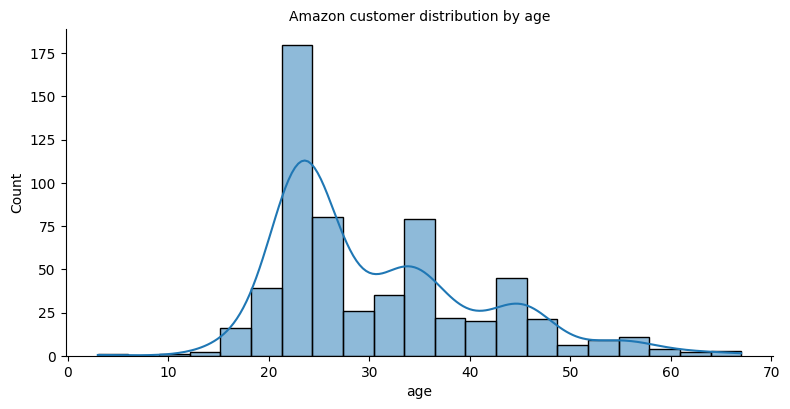

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [120]:
#Age Analysis
import statistics
sns.displot(data=df1, x='age', kde=True, height=4, aspect=2)
plt.title('Amazon customer distribution by age' , fontsize = 10)
plt.show()
plt.figure(figsize=(6,4))


In [121]:
#Gender analysis
import plotly.express as px

Gender = df['Gender'].value_counts().reset_index()
Gender.columns = ['Gender', 'count']

fig = px.pie(
    data_frame=Gender,
    names='Gender',
    values='count',
    color='Gender',
)

fig.update_layout(
    height=400, width=450, showlegend=True,
    title="Customer Gender Distribution",
    title_font_size=12, title_x=0.5
)
fig.show()


In [122]:
#Time segement analysis
import plotly.express as px

time_counts = df1['Time_Status'].value_counts().reset_index()
time_counts.columns = ['Time_Status', 'count']

fig = px.pie(
    data_frame=time_counts,
    names='Time_Status',
    values='count',
    hover_name='Time_Status',
    title='Sales breakdown by time of day'
)

fig.update_layout(height=400, width=450, title_font_size=12, title_x=0.5)
fig.show()


In [123]:
df2 = df1.copy()
df2['Age_Category'] = df1['Age_Category'].str.replace(r"\s*\(.*?\)", "", regex=True)

# (optional) keep a natural order for the cleaned labels
order_age = ["Minor", "Young Adult", "Adult", "Middle-Aged Adult", "Senior Citizen"]

fig = px.histogram(
    df2,
    x='Age_Category',
    color='Gender',
    facet_col='Time_Status',
    facet_row='Add_to_Cart_Browsing',
    barmode='overlay',
    histnorm='density',
    category_orders={
        'Time_Status': ['Morning', 'Afternoon', 'Evening', 'Night'],
        'Add_to_Cart_Browsing': ['Yes', 'No', 'Maybe'],
        'Age_Category_clean': order_age  # optional but recommended
    },
    title='Age distribution by time, add-to-cart behavior, and gender'
)

# 2) Layout
fig.update_layout(
    height=800,
    width=800,
    title_x=0.75,
    legend=dict(title="Gender", font=dict(size=10))
)

# 3) Apply to ALL subplots/facets
fig.update_xaxes(tickangle=90, tickfont=dict(size=10), title_font=dict(size=10))
fig.update_yaxes(tickfont=dict(size=10), title_font=dict(size=10))

# 4) Facet label (annotation) size
for ann in fig.layout.annotations:
    ann.font.size = 10

fig.show()


In [124]:
df2['Add_to_Cart_Browsing'].value_counts()

,count
Add_to_Cart_Browsing,
Maybe,248
Yes,216
No,138


In [125]:
#Feature selection
X = df2.drop(['Add_to_Cart_Browsing'],axis = 1)
y = df2['Add_to_Cart_Browsing']
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   age                                     602 non-null    int64 
 1   Gender                                  602 non-null    object
 2   Purchase_Frequency                      602 non-null    object
 3   Purchase_Categories                     602 non-null    object
 4   Browsing_Frequency                      602 non-null    object
 5   Product_Search_Method                   602 non-null    object
 6   Search_Result_Exploration               602 non-null    object
 7   Customer_Reviews_Importance             602 non-null    int64 
 8   Add_to_Cart_Browsing                    602 non-null    object
 9   Cart_Completion_Frequency               602 non-null    object
 10  Cart_Abandonment_Factors                602 non-null    object
 11  Savefo

In [126]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Encode y
classes = pd.Index(pd.Categorical(y).categories)   # preserves stable order
y_encoded = pd.Categorical(y, categories=classes).codes
class_to_int = {c:i for i,c in enumerate(classes)}
int_to_class = {i:c for c,i in class_to_int.items()}

#Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

#Preprocessing
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols     = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols),
    ],
    remainder='drop'
)


In [127]:
#Baseline model: LogisticRegression
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('select', SelectKBest(f_classif, k=10)),
    ('scale', MaxAbsScaler()),
    ('model', LogisticRegression(max_iter=100))
])

start = time.time()
pipe.fit(X_train, y_train)
elapsed = time.time() - start
print("Logistic Regression")
print(f"  Training and prediction time: {elapsed:.4f} s")
print(f"  Train accuracy : {pipe.score(X_train, y_train):.4f}")
print(f"  Test  accuracy : {pipe.score(X_test,  y_test):.4f}")


Logistic Regression
  Training and prediction time: 0.0352 s
  Train accuracy : 0.6362
  Test  accuracy : 0.7190


Use SMOTE techniques to balance data since three categories are not balanced for classification method

In [128]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipe = Pipeline([
    ('preprocess', preprocessor),
    ('select', SelectKBest(f_classif, k=12)),
    ('smote', SMOTE()),
    ('scale', MaxAbsScaler()),
    ('model', LogisticRegression(max_iter=100))
])

start = time.time()
pipe.fit(X_train, y_train)
elapsed = time.time() - start

print("Logistic Regression with SMOTE")
print(f"  Training and prediction time: {elapsed:.4f} s")
print(f"  Train accuracy : {pipe.score(X_train, y_train):.4f}")
print(f"  Test  accuracy : {pipe.score(X_test,  y_test):.4f}")


Logistic Regression with SMOTE
  Training and prediction time: 0.0625 s
  Train accuracy : 0.6445
  Test  accuracy : 0.6860


Use a variety of machine learning classification models to classify the values of the Add_to_Cart_Browsing column.

In [129]:
#Models before hyperparameter tuning
import time
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler, FunctionTransformer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

#Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Encode y
classes = pd.Index(pd.Categorical(y).categories)
y_encoded = pd.Categorical(y, categories=classes).codes

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

#Preprocessor
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
], remainder='drop')

#Dense transformer for SMOTE
to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x,
                               accept_sparse=True)

#Pipelines
pipelines = {
    "KNN": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('scale', MaxAbsScaler()),
        ('model', KNeighborsClassifier())
    ]),
    "SVM": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('scale', MaxAbsScaler()),
        ('model', SVC())
    ]),
    "Decision Tree": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    "GaussianNB": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('model', GaussianNB())
    ]),
    "Random Forest": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('model', RandomForestClassifier(n_estimators=200, random_state=42))
    ]),
    "XGBoost": Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('model', XGBClassifier(
            n_estimators=200, max_depth=5, learning_rate=0.1,
            eval_metric='mlogloss', random_state=42
        ))
    ]),
}

#Fit and evaluate
for name, pipe in pipelines.items():
    start = time.time()
    pipe.fit(X_train, y_train)
    elapsed = time.time() - start
    print(f"\n{name}")
    print(f"  Training and prediction time: {elapsed:.4f} s")
    print(f"  Train accuracy : {pipe.score(X_train, y_train):.4f}")
    print(f"  Test  accuracy : {pipe.score(X_test,  y_test):.4f}")
    print("-" * 40)



KNN
  Training and prediction time: 0.0510 s
  Train accuracy : 0.6694
  Test  accuracy : 0.6942
----------------------------------------

SVM
  Training and prediction time: 0.0448 s
  Train accuracy : 0.6715
  Test  accuracy : 0.6612
----------------------------------------

Decision Tree
  Training and prediction time: 0.0382 s
  Train accuracy : 0.6965
  Test  accuracy : 0.6446
----------------------------------------

GaussianNB
  Training and prediction time: 0.0354 s
  Train accuracy : 0.6403
  Test  accuracy : 0.6777
----------------------------------------

Random Forest
  Training and prediction time: 0.3709 s
  Train accuracy : 0.6965
  Test  accuracy : 0.6529
----------------------------------------

XGBoost
  Training and prediction time: 0.2280 s
  Train accuracy : 0.6965
  Test  accuracy : 0.6446
----------------------------------------


In [130]:
#Models after hyperparameter tuning
classes = pd.Index(pd.Categorical(y).categories)
y_encoded = pd.Categorical(y, categories=classes).codes

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_cols = X.select_dtypes(include=['number']).columns.tolist()

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('num', 'passthrough', numeric_cols)
], remainder='drop')

to_dense = FunctionTransformer(lambda x: x.toarray() if hasattr(x, "toarray") else x,
                               accept_sparse=True)

#Base pipeline template
def make_pipeline(model):
    return Pipeline([
        ('preprocess', preprocessor),
        ('to_dense', to_dense),
        ('smote', SMOTE(random_state=42, k_neighbors=3)),
        ('select', SelectKBest(f_classif, k=10)),
        ('scale', MaxAbsScaler()),
        ('model', model)
    ])

pipelines = {
    "Logistic Regression": make_pipeline(
        model=GaussianNB()
    ),
    "KNN": make_pipeline(KNeighborsClassifier()),
    "SVM": make_pipeline(SVC(probability=False, class_weight='balanced')),
    "Decision Tree": make_pipeline(DecisionTreeClassifier(random_state=42, class_weight='balanced')),
    "GaussianNB": make_pipeline(GaussianNB()),
    "Random Forest": make_pipeline(RandomForestClassifier(random_state=42, class_weight='balanced')),
    "XGBoost": make_pipeline(XGBClassifier(
        eval_metric='mlogloss', random_state=42, n_jobs=-1, tree_method='hist'))
}

#Parameter spaces
param_spaces = {
    "KNN": {
        'select__k': [8, 12, 16],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'smote__k_neighbors': [2, 3, 4],
    },
    "SVM": {
        'select__k': [8, 12, 16],
        'model__kernel': ['linear', 'rbf'],
        'model__C': np.logspace(-2, 2, 6),
        'model__gamma': ['scale', 'auto'],
        'smote__k_neighbors': [2, 3, 4],
    },
    "Decision Tree": {
        'select__k': [8, 12, 16],
        'model__max_depth': [None, 5, 10],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__criterion': ['gini', 'entropy', 'log_loss'],
        'smote__k_neighbors': [2, 3],
    },
    "GaussianNB": {
        'select__k': [8, 12, 16],
        'model__var_smoothing': np.logspace(-11, -8, 6),
        'smote__k_neighbors': [2, 3],
    },
    "Random Forest": {
        'select__k': [8, 12, 16],
        'model__n_estimators': [150, 200, 300],
        'model__max_depth': [None, 10, 20],
        'model__min_samples_split': [2, 5],
        'model__min_samples_leaf': [1, 2],
        'model__max_features': ['sqrt', 0.5],
        'smote__k_neighbors': [2, 3],
    },
    "XGBoost": {
        'select__k': [8, 12, 16],
        'model__n_estimators': [150, 200, 300],
        'model__max_depth': [3, 4, 5],
        'model__learning_rate': [0.05, 0.1],
        'model__subsample': [0.8, 1.0],
        'model__colsample_bytree': [0.8, 1.0],
        'smote__k_neighbors': [2, 3],
    },
}

cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

best_models = {}
for name, pipe in pipelines.items():
    if name not in param_spaces:
        continue
    print(f"\n=== Tuning {name} ===")
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=param_spaces[name],
        n_iter=10,
        scoring='f1_macro',
        cv=cv,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    start = time.time()
    search.fit(X_train, y_train)
    elapsed = time.time() - start

    best_models[name] = search.best_estimator_
    print(f"  Best CV f1_macro: {search.best_score_:.4f}")
    print(f"  Best Params: {search.best_params_}")
    print(f"  Fit time: {elapsed:.2f} s")

#Final test evaluation
for name, model in best_models.items():
    print(f"\n{name}")

    start = time.time()
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    elapsed = time.time() - start

    print(f"  Training and prediction time: {elapsed:.4f} s")
    print(f"  Train accuracy : {train_acc:.4f}")
    print(f"  Test  accuracy : {test_acc:.4f}")
    print("-" * 40)










=== Tuning KNN ===
Fitting 4 folds for each of 10 candidates, totalling 40 fits
  Best CV f1_macro: 0.5992
  Best Params: {'smote__k_neighbors': 4, 'select__k': 16, 'model__weights': 'uniform', 'model__n_neighbors': 7}
  Fit time: 1.55 s

=== Tuning SVM ===
Fitting 4 folds for each of 10 candidates, totalling 40 fits
  Best CV f1_macro: 0.6268
  Best Params: {'smote__k_neighbors': 2, 'select__k': 16, 'model__kernel': 'rbf', 'model__gamma': 'scale', 'model__C': np.float64(0.01)}
  Fit time: 2.78 s

=== Tuning Decision Tree ===
Fitting 4 folds for each of 10 candidates, totalling 40 fits
  Best CV f1_macro: 0.5987
  Best Params: {'smote__k_neighbors': 3, 'select__k': 12, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_depth': 5, 'model__criterion': 'log_loss'}
  Fit time: 1.69 s

=== Tuning GaussianNB ===
Fitting 4 folds for each of 10 candidates, totalling 40 fits
  Best CV f1_macro: 0.5507
  Best Params: {'smote__k_neighbors': 3, 'select__k': 16, 'model__var_s